# Activité découverte régression linéaire multiple

## Introduction théorique
La régression linéaire multiple est une méthode statistique permettant de
modéliser la relation entre une variable dépendante (ou cible) et plusieurs
variables indépendantes (ou prédicteurs).

## Exemple pratique :
* Prédire le prix d'une maison en fonction de :
* Superficie (en m²)
* Nombre de chambres
* Proximité du centre-ville (en km)

## Objectifs de cette activité :
1.  Implémenter une régression linéaire multiple avec Python.
2.  Analyser les coefficients des variables explicatives.
3.  Évaluer les performances du modèle.
4.  Tester le modèle avec de nouvelles données.

## Étapes pratiques

In [28]:
# importtation des bibliothèques
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [56]:
data = pd.read_csv("regression_multiple.csv")
data.head()

,Superficie,Nombre de chambres,Proximité du centre,Prix
0,152,1,9.306509,476.279241
1,142,5,5.629593,535.910505
2,64,5,8.499316,279.067426
3,156,3,5.449101,531.408138
4,121,2,6.424064,411.389675


## Analyse exploratoire des données

In [3]:
#nombre d'observations et de variables
data.shape

(1000, 4)

In [57]:
#analyse descriptive
data.describe()

,Superficie,Nombre de chambres,Proximité du centre,Prix
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,125.846000,2.997000,5.256021,446.381427
std,43.786911,1.423734,2.746007,133.401741
min,50.000000,1.000000,0.501280,176.963125
25%,88.000000,2.000000,2.967089,333.717050
50%,126.500000,3.000000,5.303712,446.780920
75%,164.000000,4.000000,7.665203,559.501390
max,199.000000,5.000000,9.984301,713.698000


In [58]:
#renomer les colonnes du jeu de données avec rename
data = data.rename(columns={'Superficie': 'superficie', 'Nombre de chambres': 'chambres', 'Proximité du centre': 'Proximite'})

In [59]:
#corrélation entre les variables
data.corr()

,superficie,chambres,Proximite,Prix
superficie,1.000000,-0.046637,-0.015213,0.982056
chambres,-0.046637,1.000000,0.017252,0.065799
Proximite,-0.015213,0.017252,1.000000,-0.052392
Prix,0.982056,0.065799,-0.052392,1.000000


In [32]:
#valeurs manquantes
data.isna().sum()

superficie    0
chambres      0
Proximite     0
Prix          0
dtype: int64

In [33]:
#valeur vides
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   superficie  1000 non-null   int64  
 1   chambres    1000 non-null   int64  
 2   Proximite   1000 non-null   float64
 3   Prix        1000 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 31.4 KB


In [8]:
#ducpliquons les données
data = data.drop_duplicates()
data.shape

(1000, 4)

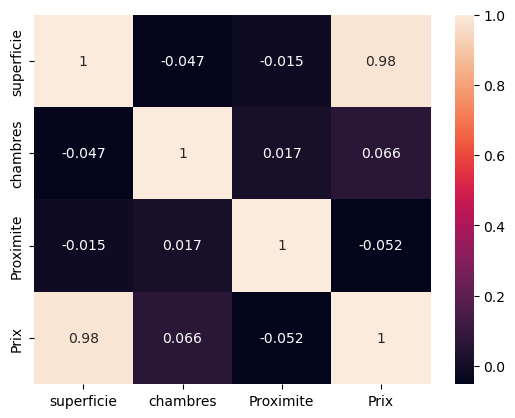

In [35]:
#heatmap des corrélations
sns.heatmap(data.corr(), annot=True)
plt.show()

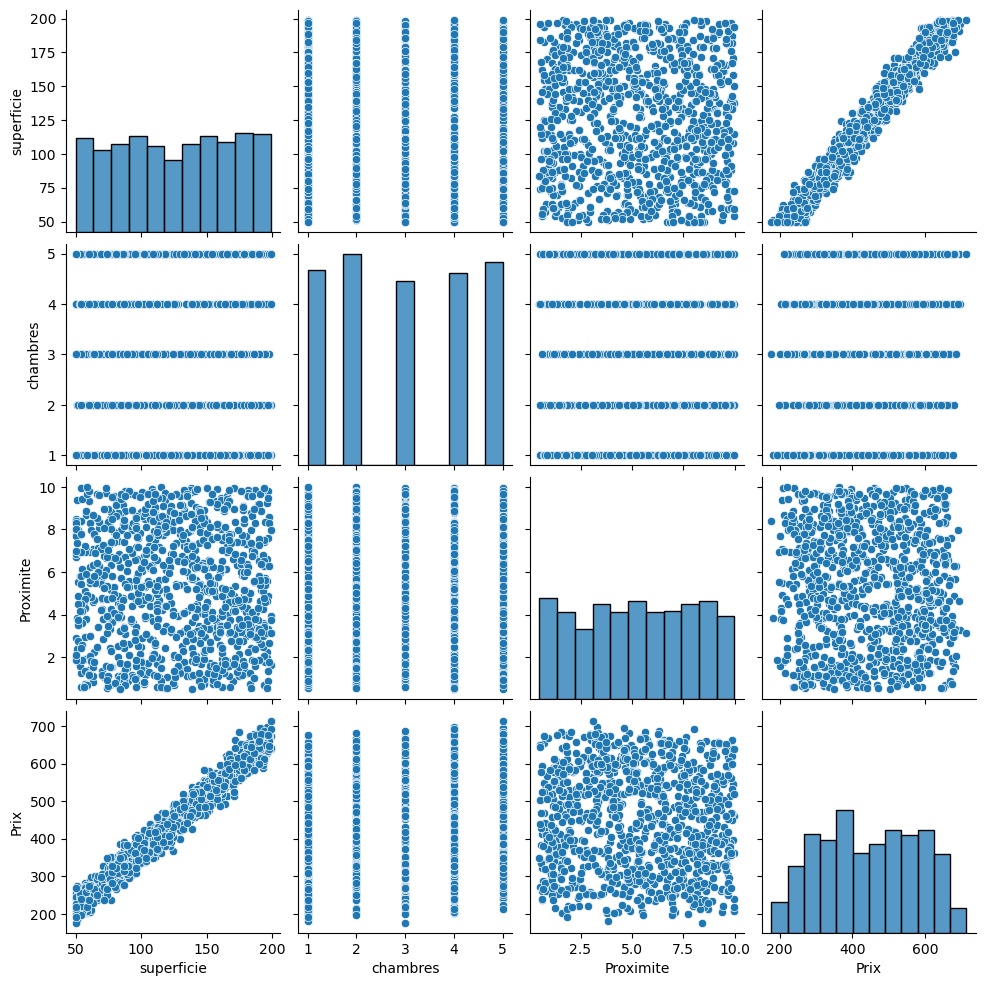

In [36]:
#nuages des points
sns.pairplot(data)

C:\Users\HP\AppData\Local\Temp\ipykernel_10872\1854886956.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.Prix)


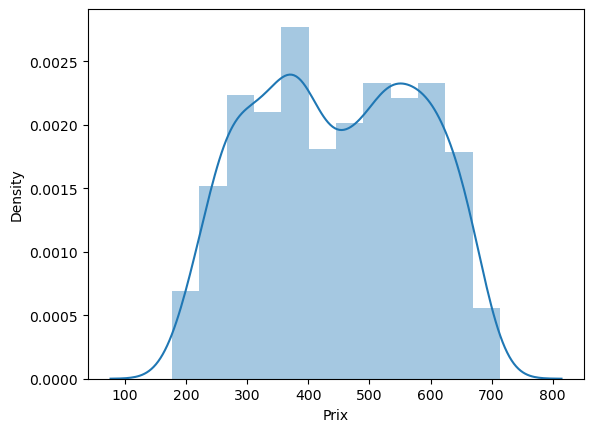

In [37]:
#distribution des vraibales avec un histogramme et une densité
sns.distplot(data.Prix)
plt.show()



# Test d'hypothèse sur la normalité des variables 
* H₀ (hypothèse nulle) : Les données suivent une distribution normale.
* H₁ (hypothèse alternative) : Les données ne suivent pas une distribution normale.

- si la p-value < 5% alors on accepte H0 d'ou H0 est vérifié 
- Si la p-value > 5% alors  on rejette H0 et H1 est vérifié

In [39]:
#test de normalité
from scipy.stats import shapiro
stat, p = shapiro(data)
print("Statistique de test :", stat)
print("p-value :", p)

if p > 0.05:
    print("Les données suivent une distribution normale.")
else:
    print("Les données ne suivent pas une distribution normale.")

Statistique de test : 0.7539144992486082
p-value : 6.70989746237282e-61
Les données ne suivent pas une distribution normale.


## Hypothèses du test de Spearman :
- H₀ (hypothèse nulle) : Il n'y a pas de relation monotone (aucune corrélation) entre les deux variables.
- H₁ (hypothèse alternative) : Il y a une relation monotone (corrélation) entre les deux variables.
Interprétation du coefficient de corrélation :
* ρ (rho) de Spearman varie entre -1 et 1.
- ρ=1 : Corrélation parfaite positive.
- ρ=−1 : Corrélation parfaite négative.
- ρ=0 : Aucune corrélation monotone.

In [40]:
df = data.copy()

In [41]:
from scipy.stats import spearmanr
X = df.drop("Prix", axis=1)
y = df["Prix"]
rho, p_value = spearmanr(X, y)

print("Coefficient de corrélation de Spearman :", rho)
print("p-value :", p_value)

if np.any(p_value < 0.05):
    print("Il y a une corrélation significative entre les variables.")
else:
    print("Il n'y a pas de corrélation significative entre les variables.")

Coefficient de corrélation de Spearman : [[ 1.         -0.04702998 -0.01736142  0.98239054]
 [-0.04702998  1.          0.01545173  0.06193624]
 [-0.01736142  0.01545173  1.         -0.052889  ]
 [ 0.98239054  0.06193624 -0.052889    1.        ]]
p-value : [[0.         0.13723126 0.58343718 0.        ]
 [0.13723126 0.         0.62551835 0.05022693]
 [0.58343718 0.62551835 0.         0.09460814]
 [0.         0.05022693 0.09460814 0.        ]]
Il y a une corrélation significative entre les variables.


In [42]:
df = data.copy()

# Entrainnement du modèle

In [43]:
#Selection de features et target

X.shape, y.shape

((1000, 3), (1000,))

In [44]:
#speraper les donnees en train et test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 3), (200, 3), (800,), (200,))

In [45]:
#regression lineaire
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [46]:
#evaluation du modele
y_pred = model.predict(X_test)
#afficher les valeurs prédites et les vraies valeurs dans un dataframe
df = pd.DataFrame({"Vraies valeurs": y_test, "Valeurs prédites": y_pred})
df

,Vraies valeurs,Valeurs prédites
521,374.276012,385.282914
737,605.801574,633.842678
740,419.368326,424.365686
660,306.497993,326.717151
411,285.515092,304.818554
...,...,...
408,430.566369,442.890110
332,348.698167,378.837892
208,242.595532,216.634636
613,347.880193,335.085211


MSE Entraînement: 390.2340964300977
MSE Test: 354.38714759725394


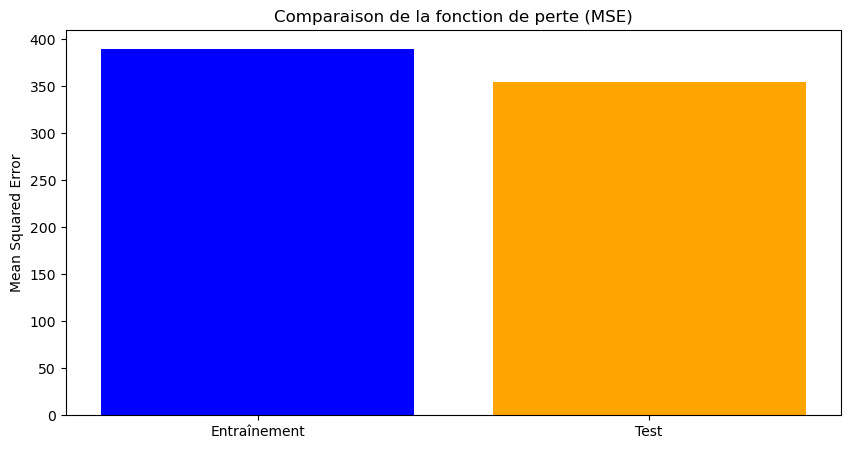

In [47]:
# Calculer la fonction de perte (MSE) pour l'ensemble d'entraînement
y_train_pred = model.predict(X_train)
mse_train = np.mean((y_train - y_train_pred) ** 2)

# Calculer la fonction de perte (MSE) pour l'ensemble de test
y_test_pred = model.predict(X_test)
mse_test = np.mean((y_test - y_test_pred) ** 2)

# Afficher les valeurs de MSE
print(f"MSE Entraînement: {mse_train}")
print(f"MSE Test: {mse_test}")

# Tracer les valeurs de MSE et R2
plt.figure(figsize=(10, 5))
plt.bar(['Entraînement', 'Test'], [mse_train, mse_test], color=['blue', 'orange'])
plt.title('Comparaison de la fonction de perte (MSE)')
plt.ylabel('Mean Squared Error')
plt.show()

In [48]:
#metrique de performance de la regression lineaire entre les valeurs prédites et les vraies valeurs
from sklearn.metrics import r2_score, mean_squared_error
r2 = r2_score(y_test, y_pred)
print(f"R2: {r2}")
print(f"MSE: {mean_squared_error(y_test, y_pred)}")

R2: 0.9818586860801203
MSE: 354.38714759725394


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   superficie  1000 non-null   int64  
 1   chambres    1000 non-null   int64  
 2   Proximite   1000 non-null   float64
 3   Prix        1000 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 31.4 KB


In [52]:
#contruire les nouvelles données et les prédire
new_data = pd.DataFrame({"superficie": [200, 300, 400], "chambres": [2, 3, 4], "Proximite": [9.5, 8, 7]})
new_data

,superficie,chambres,Proximite
0,200,2,9.5
1,300,3,8.0
2,400,4,7.0


In [53]:
prediction = model.predict(new_data)
#afficher les valeurs prédites et les vraies valeurs dans un dataframe
df = pd.DataFrame({"superficie": new_data["superficie"], "chambres": new_data["chambres"], "Proximite": new_data["Proximite"], "Prix prédit": prediction})
df

,superficie,chambres,Proximite,Prix prédit
0,200,2,9.5,650.084859
1,300,3,8.0,964.015445
2,400,4,7.0,1276.943225


In [60]:
df = data.to_csv('prediction.csv', index=False)

In [54]:
import pickle

#enregistrer le modele
pickle.dump(model, open('model.pkl', 'wb'))